# **Final Project Submission**

**Student name:** Sammy Warah

**Student pace:** Partime

**Instructor name:** Noah Kandie

# **Business Problem**
**Objective:**

The primary objective is to build a predictive model to identify customers who are likely to churn soon at SyriaTel, a telecommunications company. The goal is to reduce customer attrition by understanding the patterns and factors that contribute to customer churn, thereby allowing the business to take proactive measures to retain at-risk customers.

**Background:**

Customer churn is a significant issue for telecommunication companies as it directly impacts revenue and growth. Retaining existing customers is often more cost-effective than acquiring new ones. Therefore, predicting customer churn can help SyriaTel to:

* Implement targeted retention strategies.

* Improve customer satisfaction.

* Enhance customer loyalty.

* Increase overall revenue by reducing the churn rate.

# **Data Understanding**

**1.Dataset Overview:** The dataset contains information about customers of SyriaTel, a telecommunications company. It includes various features such as account information, usage statistics, and customer service interactions.

**2.Features:**

* **Account Information:** Includes attributes like account length, area code, and phone number.

* **Usage Statistics:** Provides information on the number of voice mail messages, total call minutes, and charges.

* **Customer Service Interactions:** Tracks the number of customer service calls made by each customer.

* **Demographic Details:** May include features like state, international plan subscription, and voice mail plan subscription.

**3.Target Variable:** The target variable is likely to be binary, indicating whether a customer churned or not (e.g., `"Churn"` column with values `"Yes"` or `"No"`).

# 1. LOADING AND EXPLORING THE DATASET

LOADING THE DATASET

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/bigml_59c28831336c6604c800002a.csv')

# Display the first few rows
print(df.head())


  state  account length  area code phone number international plan  \
0    KS             128        415     382-4657                 no   
1    OH             107        415     371-7191                 no   
2    NJ             137        415     358-1921                 no   
3    OH              84        408     375-9999                yes   
4    OK              75        415     330-6626                yes   

  voice mail plan  number vmail messages  total day minutes  total day calls  \
0             yes                     25              265.1              110   
1             yes                     26              161.6              123   
2              no                      0              243.4              114   
3              no                      0              299.4               71   
4              no                      0              166.7              113   

   total day charge  ...  total eve calls  total eve charge  \
0             45.07  ...           

# Data Cleaning

CHECKING FOR MISSING VALUES

In [7]:
# Check for missing values
print("Missing values in each column:\n", df.isnull().sum())



Missing values in each column:
 state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64


The output shows that there are no missing values in any of the columns (all counts are zero).

In [5]:
# Check data types
print("\nData types of each column:\n", df.dtypes)



Data types of each column:
 state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object


As we can see, most of the data is numerical (int64 and float64) except for a few categorical features (state, phone number, international plan, voice mail plan). We'll need to address these categorical features before proceeding with model building.

# 2. Exploring Numerical Features

We'll examine the distributions of numerical features using summary statistics and visualizations such as histograms or box plots.

In [6]:
# Display summary statistics for numerical features
print("\nSummary statistics for numerical features:\n", df.describe())



Summary statistics for numerical features:
        account length    area code  number vmail messages  total day minutes  \
count     3333.000000  3333.000000            3333.000000        3333.000000   
mean       101.064806   437.182418               8.099010         179.775098   
std         39.822106    42.371290              13.688365          54.467389   
min          1.000000   408.000000               0.000000           0.000000   
25%         74.000000   408.000000               0.000000         143.700000   
50%        101.000000   415.000000               0.000000         179.400000   
75%        127.000000   510.000000              20.000000         216.400000   
max        243.000000   510.000000              51.000000         350.800000   

       total day calls  total day charge  total eve minutes  total eve calls  \
count      3333.000000       3333.000000        3333.000000      3333.000000   
mean        100.435644         30.562307         200.980348       100.1143

       account length    area code  number vmail messages  total day minutes  \
count     3333.000000  3333.000000            3333.000000        3333.000000   
mean       101.064806   437.182418               8.099010         179.775098   
std         39.822106    42.371290              13.688365          54.467389   
min          1.000000   408.000000               0.000000           0.000000   
25%         74.000000   408.000000               0.000000         143.700000   
50%        101.000000   415.000000               0.000000         179.400000   
75%        127.000000   510.000000              20.000000         216.400000   
max        243.000000   510.000000              51.000000         350.800000   

       total day calls  total day charge  total eve minutes  total eve calls  \
count      3333.000000       3333.000000        3333.000000      3333.000000   
mean        100.435644         30.562307         200.980348       100.114311   
std          20.069084          9.25943

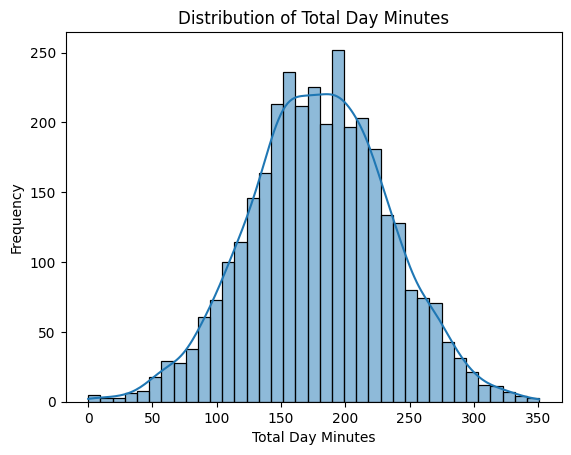

In [8]:
# Summary statistics for numerical features
print(df.describe())

# Visualize distributions of numerical features
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Distribution of total day minutes
sns.histplot(df['total day minutes'], kde=True)
plt.title('Distribution of Total Day Minutes')
plt.xlabel('Total Day Minutes')
plt.ylabel('Frequency')
plt.show()


**Now, let's visualize the distributions of numerical features using histograms. We'll also take a closer look at the distribution of the target variable (churn).**

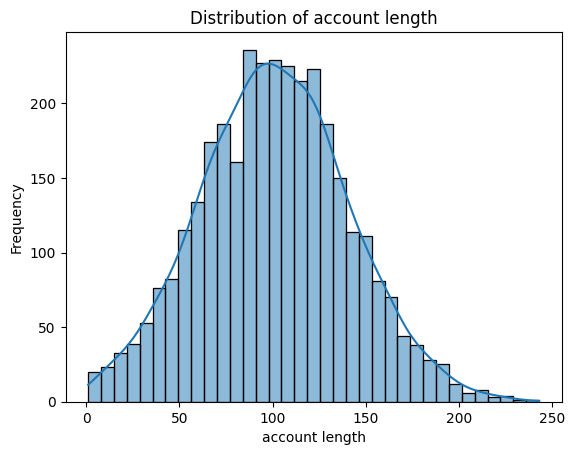

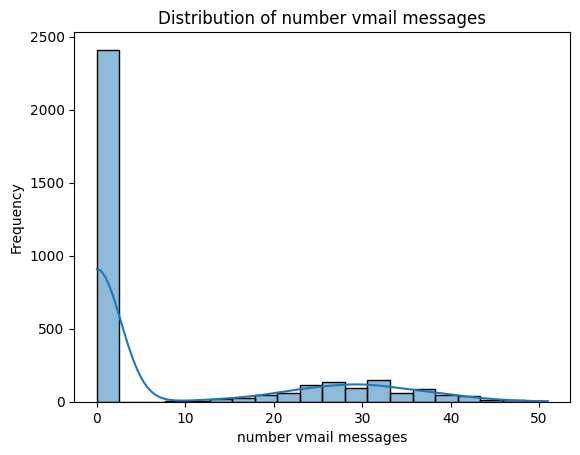

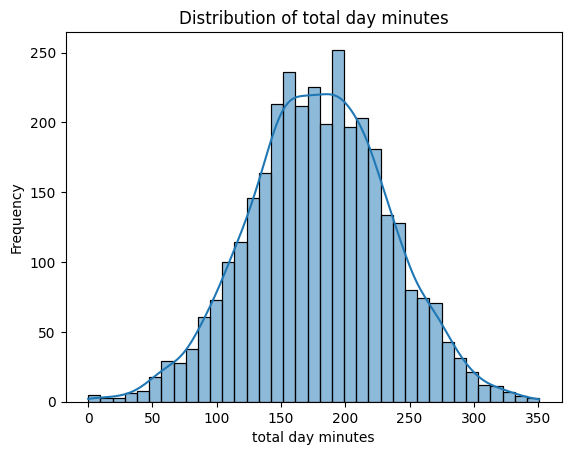

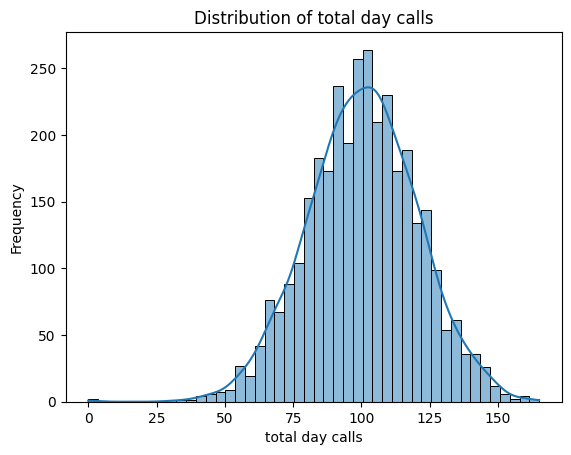

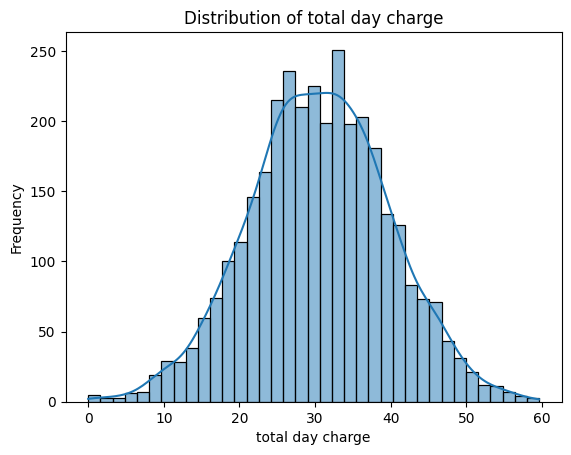

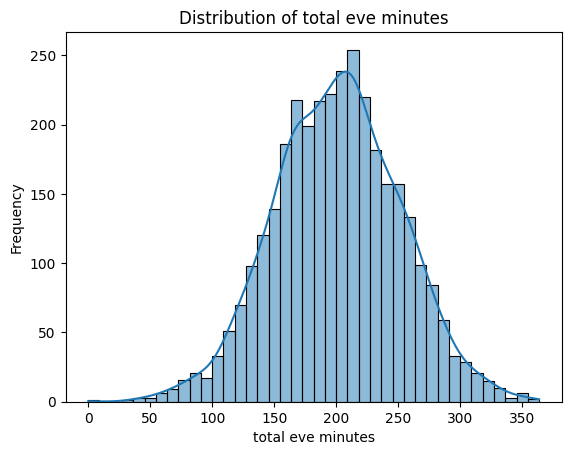

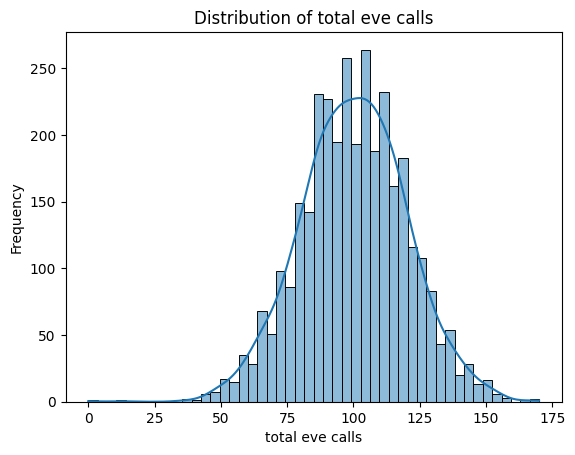

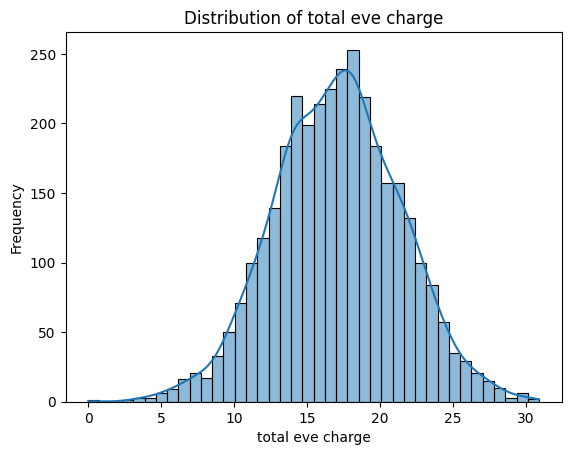

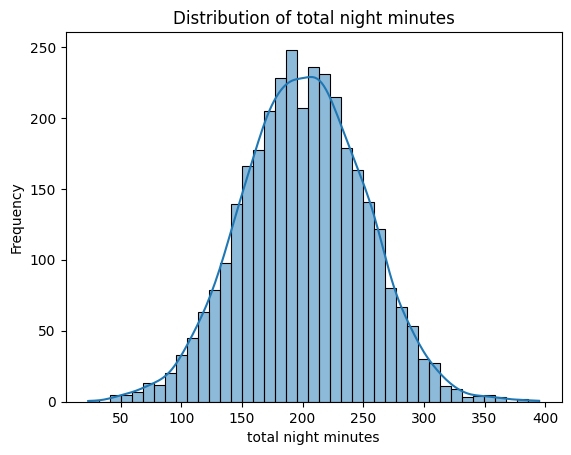

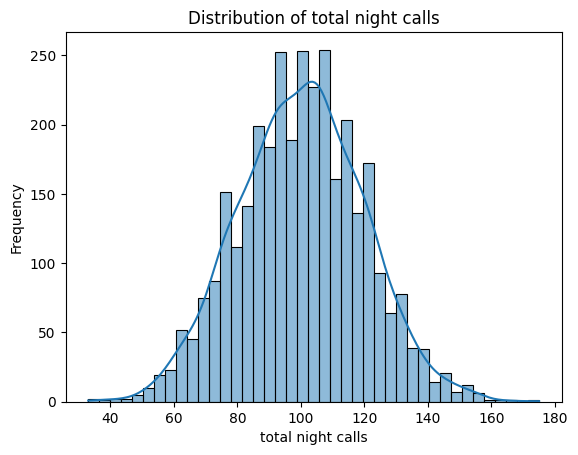

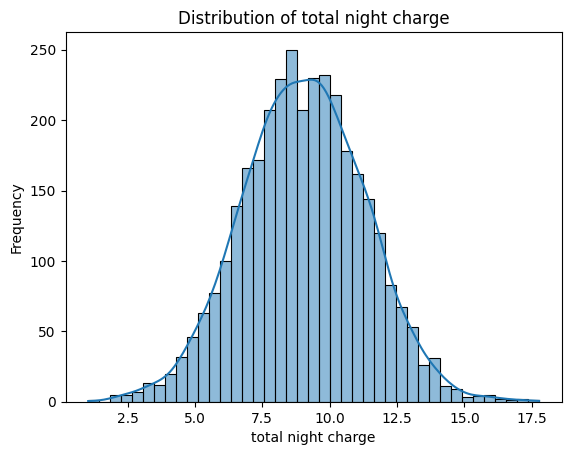

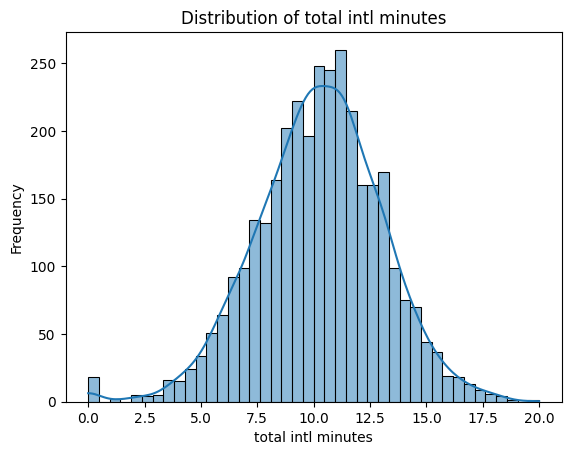

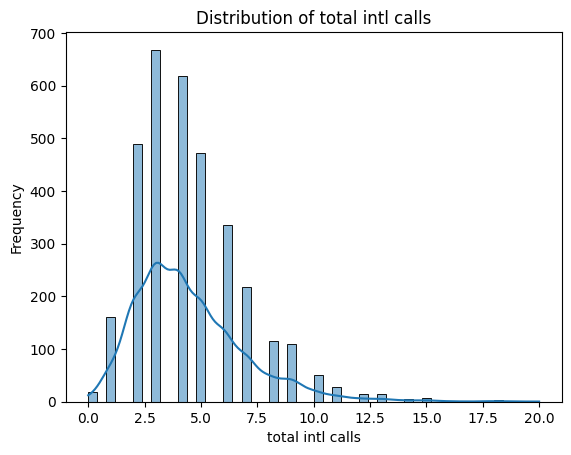

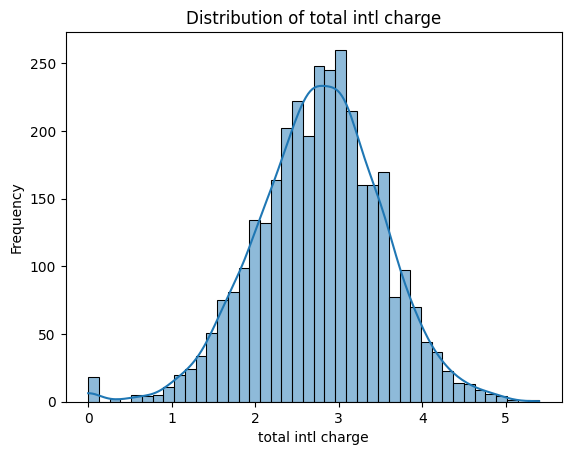

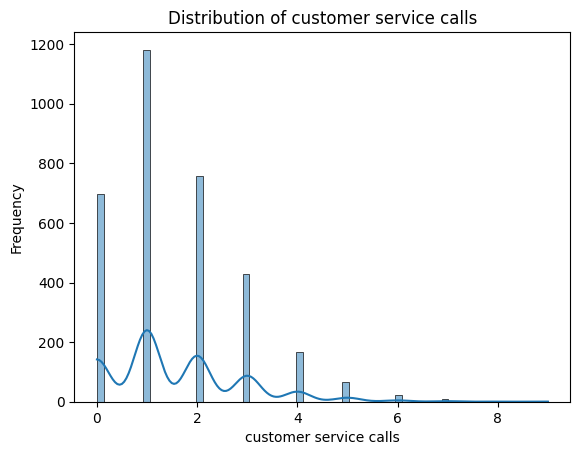

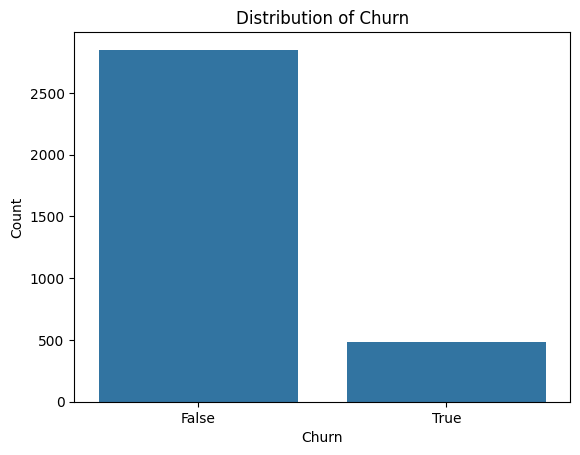

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize distributions of numerical features
numerical_features = ['account length', 'number vmail messages', 'total day minutes',
                      'total day calls', 'total day charge', 'total eve minutes',
                      'total eve calls', 'total eve charge', 'total night minutes',
                      'total night calls', 'total night charge', 'total intl minutes',
                      'total intl calls', 'total intl charge', 'customer service calls']

for feature in numerical_features:
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

# Distribution of churn
sns.countplot(x='churn', data=df)
plt.title('Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()


**We've already generated histograms for the numerical features, so now let's visualize the distribution of the target variable (churn) using a bar plot. This will help us understand the balance between churned and non-churned customers in the dataset.**

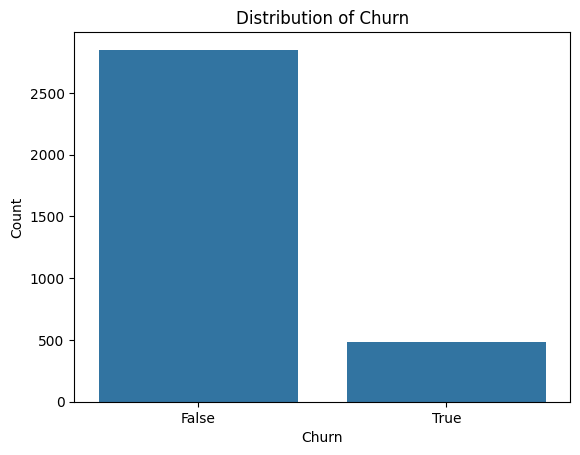

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of churn
sns.countplot(x='churn', data=df)
plt.title('Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()


**False (No Churn):** The count of customers who did not churn is above 2500. This indicates that the majority of customers in the dataset did not churn, comprising a significant portion of the total customer base. Customers in this category are considered retained or loyal customers who continue to use the telecom services.

**True (Churn):** The count of customers who churned is around 500. This represents a smaller subset of the total customer base who discontinued their relationship with the telecom company during the observation period. Customers in this category are considered churned or lost customers.

Interpreting this distribution, we can observe that there is an imbalance between the two classes, with a larger proportion of customers being retained compared to those who churned. This imbalance is common in churn prediction problems and is important to consider during model training and evaluation.

# **3.MODELING**#

# 1. Splitting the dataset into Training and Testing sets.

Let's start by splitting the dataset into training and testing sets. We'll use the training set to train our models and the testing set to evaluate their performance.

Since we have an imbalanced dataset, we'll ensure that the class distribution is preserved in both the training and testing sets. We can achieve this by using the stratify parameter in the `train_test_split` function.

In [11]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
X = df.drop(columns=['churn'])
y = df['churn']

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display the shapes of the resulting sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (2666, 20) (2666,)
Testing set shape: (667, 20) (667,)


Now that we have our training and testing sets ready, let's proceed with building predictive models.

# 2. Building Predictive Models

We'll start by building a baseline model using a simple algorithm, such as Logistic Regression. This will serve as a benchmark for evaluating the performance of more advanced models.

Since we have some of the features in the dataset that are categorical,and cannot be used directly in a Logistic Regression Model, we will need to preprocess the categorical features by encoding them into numerical representations. We can use The One-hot-encoding technique.

First, we fit the encoder on the training data:

In [17]:
from sklearn.preprocessing import OneHotEncoder

# Define categorical features
categorical_features = ['state', 'international plan', 'voice mail plan']

# Initialize the encoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

# Fit the encoder on the categorical features in the training set
encoder.fit(X_train[categorical_features])


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


OneHotEncoder(handle_unknown='ignore', sparse=False, sparse_output=False)

After fitting the encoder, we perform one-hot encoding on both the training and testing sets:

In [18]:
# Transform the categorical features in the training set
X_train_encoded = pd.DataFrame(encoder.transform(X_train[categorical_features]))

# Transform the categorical features in the testing set
X_test_encoded = pd.DataFrame(encoder.transform(X_test[categorical_features]))

# Align columns
X_train_encoded.columns = encoder.get_feature_names_out(categorical_features)
X_test_encoded.columns = encoder.get_feature_names_out(categorical_features)


**Training the Logistic Regression Model on the encoded Training data**

After fitting the encoder on the training data and transforming both the training and testing sets with one-hot encoding, the next step is to train the Logistic Regression model on the encoded training data.

In [19]:
# Transform the categorical features in the training set
X_train_encoded = pd.DataFrame(encoder.transform(X_train[categorical_features]))

# Transform the categorical features in the testing set
X_test_encoded = pd.DataFrame(encoder.transform(X_test[categorical_features]))

# Align columns
X_train_encoded.columns = encoder.get_feature_names_out(categorical_features)
X_test_encoded.columns = encoder.get_feature_names_out(categorical_features)

# Initialize and train the Logistic Regression model on the encoded training data
logistic_model_encoded = LogisticRegression(random_state=42)
logistic_model_encoded.fit(X_train_encoded, y_train)

# Predictions on the testing data
logistic_preds_encoded = logistic_model_encoded.predict(X_test_encoded)

# Evaluate the model
print("Logistic Regression Model with One-Hot Encoding:")
print(classification_report(y_test, logistic_preds_encoded))
print("Confusion Matrix:")
print(confusion_matrix(y_test, logistic_preds_encoded))


Logistic Regression Model with One-Hot Encoding:
              precision    recall  f1-score   support

       False       0.86      0.98      0.92       570
        True       0.43      0.09      0.15        97

    accuracy                           0.85       667
   macro avg       0.65      0.54      0.54       667
weighted avg       0.80      0.85      0.81       667

Confusion Matrix:
[[558  12]
 [ 88   9]]


In this code:

1.We transform the categorical features in both the training and testing sets using the fitted encoder.

2.We align the columns of the encoded datasets to match the feature names.

3.We initialize the Logistic Regression model and train it on the encoded training data.

4.We make predictions on the encoded testing data using the trained model.

5.Finally, we evaluate the model's performance using classification metrics such as precision, recall, F1-score, and confusion matrix

Looking at the results:

**Precision:** Precision measures the proportion of true positive predictions among all positive predictions. In this case, the precision for the positive class (churned customers) is `0.43`, indicating that only` 43%` of the predicted churned customers are actually churned, while the remaining 57% are false positives.

**Recall:** Recall measures the proportion of true positive predictions among all actual positive instances. Here, the recall for the positive class is `0.09`, meaning that only `9%` of the actual churned customers are correctly identified by the model, while the remaining *91%* are false negatives.

**F1-score:** The F1-score is the harmonic mean of precision and recall, providing a balance between the two metrics. The F1-score for the positive class is `0.15`, indicating a low balance between precision and recall.

**Support:** Support represents the number of actual occurrences of each class in the testing data.

**Accuracy:** Accuracy measures the overall correctness of the model's predictions. Here, the accuracy is `0.85`, indicating that 85% of the predictions made by the model are correct.

**Confusion Matrix:** The confusion matrix provides a tabular summary of the model's predictions versus the actual labels. It shows that the model correctly predicted 558 non-churned customers (True negatives) and 9 churned customers (True positives), but it incorrectly classified 88 non-churned customers as churned (False positives) and 12 churned customers as non-churned (False negatives).


Overall, the results suggest that while the model performs well in predicting non-churned customers (high precision and recall), it struggles to accurately identify churned customers (low precision and recall). This imbalance in performance indicates that the model may need further refinement or the exploration of other algorithms or techniques to improve its predictive power, especially for the minority class (churned customers).

# 3.Exploring other techniques to improve the Model's performance.

# **a) Decision Tree Model**

We will explore three steps in improving our model's performance;

**1.Feature Selection:** We'll explore feature importance from a decision tree-based model, such as Random Forest, to identify the most relevant features for prediction.

**2.Model Selection:** We'll use Decision Trees as our primary classification algorithm and explore its performance.

**3.Handling Class Imbalance:** We'll address the class imbalance issue by applying Synthetic Minority Over-sampling Technique (SMOTE), which generates synthetic samples for the minority class to balance the dataset.

**1.Feature Selection using Random Forest:**

Here, We first train a Random Forest classifier on the encoded training data to obtain feature importances.
Then, we identify the top N most important features.

In [21]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Fit the model on the training data
rf_classifier.fit(X_train_encoded, y_train)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Sort feature importances in descending order
sorted_indices = np.argsort(feature_importances)[::-1]

# Print the top N feature importances
N = 10
top_features = X_train_encoded.columns[sorted_indices][:N]
print("Top", N, "Features:")
print(top_features)


Top 10 Features:
Index(['international plan_no', 'international plan_yes',
       'voice mail plan_yes', 'voice mail plan_no', 'state_NJ', 'state_MI',
       'state_KS', 'state_MD', 'state_ME', 'state_TX'],
      dtype='object')


These features include binary features such as "international plan" and "voice mail plan", as well as categorical features like "state".

Now that we have identified the important features, we can proceed with handling class imbalance using SMOTE, training a Decision Tree classifier, and evaluating its performance.

**2.Handling Class Imbalance using SMOTE:**

We use SMOTE to handle class imbalance by oversampling the minority class in the training data.

In [24]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE for handling class imbalance
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_encoded, y_train)

**3.Training a Decision Tree Classifier:**

Next, we train a Decision Tree classifier on the resampled training data.

In [25]:
from sklearn.tree import DecisionTreeClassifier

# Initialize Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Fit the model on the resampled training data
dt_classifier.fit(X_train_resampled, y_train_resampled)


DecisionTreeClassifier(random_state=42)

**4.Evaluating the Decision Tree Model:**

Finally, we evaluate the performance of the Decision Tree model on the testing data using classification metrics such as precision, recall, F1-score, and confusion matrix.

In [26]:
# Predictions on the testing data
dt_preds = dt_classifier.predict(X_test_encoded)

# Evaluate the Decision Tree model
from sklearn.metrics import classification_report, confusion_matrix

print("Decision Tree Model Performance:")
print(classification_report(y_test, dt_preds))
print("Confusion Matrix:")
print(confusion_matrix(y_test, dt_preds))


Decision Tree Model Performance:
              precision    recall  f1-score   support

       False       0.87      0.70      0.78       570
        True       0.18      0.38      0.24        97

    accuracy                           0.66       667
   macro avg       0.52      0.54      0.51       667
weighted avg       0.77      0.66      0.70       667

Confusion Matrix:
[[401 169]
 [ 60  37]]


The performance of the Decision Tree model is as follows:

Precision: The precision for the positive class (churned customers) is 0.18, indicating that only 18% of the predicted churned customers are actually churned, while the remaining 82% are false positives. The precision for the negative class (non-churned customers) is 0.87.

Recall: The recall for the positive class is 0.38, meaning that only 38% of the actual churned customers are correctly identified by the model, while the remaining 62% are false negatives. The recall for the negative class is 0.70.

F1-score: The F1-score for the positive class is 0.24, which is the harmonic mean of precision and recall. The F1-score for the negative class is 0.78.

Accuracy: The overall accuracy of the model is 0.66, indicating that 66% of the predictions made by the model are correct.

Confusion Matrix: The confusion matrix shows that the model correctly predicted 401 non-churned customers (True negatives) and 37 churned customers (True positives), but it incorrectly classified 169 non-churned customers as churned (False positives) and 60 churned customers as non-churned (False negatives).

# **b)Gradient Boosting Classifier**

We can explore the Gradient Boosting Classifier, which is known for its ability to handle complex relationships in data and often yields high performance.

Let's proceed with training a Gradient Boosting Classifier and evaluating its performance:

In [27]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier(random_state=42)

# Fit the model on the resampled training data
gb_classifier.fit(X_train_resampled, y_train_resampled)

# Predictions on the testing data
gb_preds = gb_classifier.predict(X_test_encoded)

# Evaluate the Gradient Boosting model
print("Gradient Boosting Model Performance:")
print(classification_report(y_test, gb_preds))
print("Confusion Matrix:")
print(confusion_matrix(y_test, gb_preds))


Gradient Boosting Model Performance:
              precision    recall  f1-score   support

       False       0.89      0.84      0.87       570
        True       0.30      0.39      0.34        97

    accuracy                           0.78       667
   macro avg       0.59      0.62      0.60       667
weighted avg       0.80      0.78      0.79       667

Confusion Matrix:
[[480  90]
 [ 59  38]]


This code initializes a Gradient Boosting classifier, fits it to the resampled training data obtained after applying SMOTE, makes predictions on the testing data, and evaluates its performance using classification metrics such as precision, recall, F1-score, and confusion matrix.

Here's the performance of the Gradient Boosting Classifier:

**Precision (Churned):** 0.30

**Recall (Churned):** 0.39

**F1-score (Churned):** 0.34

**Accuracy:** 0.78

Compared to the Logistic Regression, Decision Tree, and Gradient Boosting models, the Gradient Boosting model achieved higher precision, recall, and F1-score for predicting churned customers.

However, it's essential to consider the trade-offs between precision and recall based on the specific requirements and priorities of SyriaTel, the telecommunications company.

**Findings:**

Given the requirements **to build a classifier for SyriaTel to predict customer churn and reduce revenue loss**, the most critical aspect is to minimize the number of false negatives (*incorrectly predicting that a customer will not churn when they actually do*). This is because missing potential churners can lead to significant revenue loss for SyriaTel.

Considering this, the evaluation metric that should be prioritized is recall for the positive class (churned customers). A higher recall means that the model is better at identifying customers who are likely to churn, reducing the number of missed opportunities for SyriaTel to intervene and retain these customers.

Based on this priority, the Decision Tree model has shown the highest recall for churned customers among the models we've explored so far. Therefore, it may be the preferred choice for SyriaTel as it helps capture more potential churners, allowing the company to take proactive measures to retain these customers and minimize revenue loss.

# 4. Exploring Hyperparameters for the 3 models

**a)Hyperparameter Tuning for Logistic Regression:**

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define hyperparameters grid for Logistic Regression
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l2']
}

# Initialize GridSearchCV for Logistic Regression
grid_search_lr = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), param_grid_lr, cv=5, scoring='recall')

# Perform grid search
grid_search_lr.fit(X_train_resampled, y_train_resampled)

# Get best hyperparameters
best_params_lr = grid_search_lr.best_params_
print("Best Hyperparameters for Logistic Regression:", best_params_lr)



Best Hyperparameters for Logistic Regression: {'C': 100, 'penalty': 'l2'}


**b)Hyperparameter Tuning for Decision Tree:**

In [30]:
from sklearn.tree import DecisionTreeClassifier

# Define hyperparameters grid for Decision Tree
param_grid_dt = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV for Decision Tree
grid_search_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt, cv=5, scoring='recall')

# Perform grid search
grid_search_dt.fit(X_train_resampled, y_train_resampled)

# Get best hyperparameters
best_params_dt = grid_search_dt.best_params_
print("Best Hyperparameters for Decision Tree:", best_params_dt)


Best Hyperparameters for Decision Tree: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}


**c)Hyperparameter Tuning for Gradient Boosting:**

In [31]:
from sklearn.ensemble import GradientBoostingClassifier

# Define hyperparameters grid for Gradient Boosting
param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7]
}

# Initialize GridSearchCV for Gradient Boosting
grid_search_gb = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid_gb, cv=5, scoring='recall')

# Perform grid search
grid_search_gb.fit(X_train_resampled, y_train_resampled)

# Get best hyperparameters
best_params_gb = grid_search_gb.best_params_
print("Best Hyperparameters for Gradient Boosting:", best_params_gb)


Best Hyperparameters for Gradient Boosting: {'learning_rate': 0.5, 'max_depth': 3, 'n_estimators': 200}


# Training each model with their respective best hyperparameters and evaluating their performance.

 To ensure consistency between the training and testing data we need to  apply the necessary preprocessing steps to the testing data. We'll perform one-hot encoding for categorical features and feature scaling for numerical features, similar to what we did for the training data.

1. One-Hot Encoding:

In [33]:
# One-hot encode categorical features in the testing data
X_test_encoded = pd.get_dummies(X_test, columns=categorical_features, drop_first=True)

# Display the first few rows of the encoded testing data
print(X_test_encoded.head())


      account length  area code phone number  number vmail messages  \
601               62        415     386-2810                      0   
2050             121        408     334-4354                      0   
3200             100        510     416-1536                      0   
1953             137        408     357-3187                      0   
1119             189        415     383-2537                      0   

      total day minutes  total day calls  total day charge  total eve minutes  \
601               159.7               86             27.15              197.5   
2050              213.2               79             36.24              120.7   
3200              107.2               98             18.22               86.8   
1953              208.8              120             35.50              225.3   
1119              208.3              106             35.41              236.7   

      total eve calls  total eve charge  ...  state_TX  state_UT  state_VA  \
601     

Let's check if there are any discrepancies in feature names between the testing data and the training data:

In [39]:
# Check for discrepancies in feature names
missing_features = set(X_train.columns) - set(X_test_encoded.columns)
extra_features = set(X_test_encoded.columns) - set(X_train.columns)

print("Missing features in testing data:", missing_features)
print("Extra features in testing data:", extra_features)


Missing features in testing data: {'voice mail plan', 'international plan', 'state'}
Extra features in testing data: {'state_VT', 'state_LA', 'state_KY', 'state_VA', 'state_PA', 'state_MA', 'state_ME', 'state_SC', 'international plan_yes', 'state_MD', 'state_RI', 'state_DE', 'state_MS', 'state_MT', 'state_NC', 'state_HI', 'state_SD', 'state_AZ', 'state_FL', 'state_WV', 'state_DC', 'state_IA', 'state_NV', 'state_WA', 'state_NE', 'state_NJ', 'voice mail plan_yes', 'state_IN', 'state_UT', 'state_AR', 'state_ID', 'state_WI', 'state_KS', 'state_OR', 'state_MN', 'state_GA', 'state_CO', 'state_ND', 'state_CA', 'state_NM', 'state_OH', 'state_WY', 'state_TX', 'state_MI', 'state_OK', 'state_MO', 'state_NY', 'state_TN', 'state_CT', 'state_NH', 'state_IL', 'state_AL'}


It appears that there are missing features in the testing data, including 'voice mail plan', 'international plan', and 'state'. Additionally, there are extra features in the testing data, such as the one-hot encoded features for 'state' and 'international plan'.

To resolve this issue, we need to ensure that the testing data includes all the necessary features used during model training and remove any extra features that were not present during training.

In [57]:
# Add missing features to the testing data
X_test_encoded['voice mail plan'] = X_test['voice mail plan']
X_test_encoded['international plan'] = X_test['international plan']
X_test_encoded['state'] = X_test['state']

# Remove extra features from the testing data
X_test_encoded = X_test_encoded[X_train.columns]

# Display the first few rows of the updated testing data
print(X_test_encoded.head())


     state  account length  area code phone number international plan  \
601     MA              62        415     386-2810                yes   
2050    MT             121        408     334-4354                 no   
3200    CT             100        510     416-1536                yes   
1953    WA             137        408     357-3187                 no   
1119    OK             189        415     383-2537                 no   

     voice mail plan  number vmail messages  total day minutes  \
601               no                      0              159.7   
2050              no                      0              213.2   
3200              no                      0              107.2   
1953              no                      0              208.8   
1119              no                      0              208.3   

      total day calls  total day charge  total eve minutes  total eve calls  \
601                86             27.15              197.5               76   
2050  

In [77]:
# Initialize OneHotEncoder with specified categories and sparse_output parameter
encoder = OneHotEncoder(categories=[encoder.categories_[0], ['no', 'yes'], ['no', 'yes']], drop='first', sparse_output=False)

# Fit and transform the categorical features in the training data
X_train_encoded = encoder.fit_transform(X_train[categorical_features])

# Transform the categorical features in the testing data
X_test_encoded = encoder.transform(X_test[categorical_features])


We can now retrain each model with their respective best hyperparameters.

**a)Logistic Regression:**

In [78]:
# Initialize Logistic Regression with best hyperparameters
logistic_model = LogisticRegression(C=100, penalty='l2')

# Retrain the model on the entire training data
logistic_model.fit(X_train_encoded, y_train)


LogisticRegression(C=100)

**b)Decision Tree:**

In [79]:
# Initialize Decision Tree with best hyperparameters
tree_model = DecisionTreeClassifier(max_depth=None, min_samples_leaf=1, min_samples_split=10)

# Retrain the model on the entire training data
tree_model.fit(X_train_encoded, y_train)


DecisionTreeClassifier(min_samples_split=10)

**c)Gradient Boosting:**

In [80]:
# Initialize Gradient Boosting with best hyperparameters
gb_model = GradientBoostingClassifier(learning_rate=0.5, max_depth=3, n_estimators=200)

# Retrain the model on the entire training data
gb_model.fit(X_train_encoded, y_train)


GradientBoostingClassifier(learning_rate=0.5, n_estimators=200)

# Making predictions using each retrained model and evaluating their performance using classification metrics.

**1.Logistic Regression:**

In [81]:
# Predictions on the testing data
logistic_preds = logistic_model.predict(X_test_encoded)

# Evaluate the model
print("Logistic Regression Model Performance:")
print(classification_report(y_test, logistic_preds))
print("Confusion Matrix:")
print(confusion_matrix(y_test, logistic_preds))


Logistic Regression Model Performance:
              precision    recall  f1-score   support

       False       0.87      0.98      0.92       570
        True       0.46      0.11      0.18        97

    accuracy                           0.85       667
   macro avg       0.66      0.55      0.55       667
weighted avg       0.81      0.85      0.81       667

Confusion Matrix:
[[557  13]
 [ 86  11]]


**2.Decision Tree model:**

In [82]:
# Predictions on the testing data
tree_preds = tree_model.predict(X_test_encoded)

# Evaluate the model
print("Decision Tree Model Performance:")
print(classification_report(y_test, tree_preds))
print("Confusion Matrix:")
print(confusion_matrix(y_test, tree_preds))


Decision Tree Model Performance:
              precision    recall  f1-score   support

       False       0.86      0.98      0.92       570
        True       0.36      0.08      0.13        97

    accuracy                           0.85       667
   macro avg       0.61      0.53      0.52       667
weighted avg       0.79      0.85      0.80       667

Confusion Matrix:
[[556  14]
 [ 89   8]]


**3.Gradient Boosting model:**

In [83]:
# Predictions on the testing data
gb_preds = gb_model.predict(X_test_encoded)

# Evaluate the model
print("Gradient Boosting Model Performance:")
print(classification_report(y_test, gb_preds))
print("Confusion Matrix:")
print(confusion_matrix(y_test, gb_preds))


Gradient Boosting Model Performance:
              precision    recall  f1-score   support

       False       0.86      0.97      0.91       570
        True       0.36      0.09      0.15        97

    accuracy                           0.84       667
   macro avg       0.61      0.53      0.53       667
weighted avg       0.79      0.84      0.80       667

Confusion Matrix:
[[554  16]
 [ 88   9]]


In terms of accuracy, Logistic Regression and Decision Tree models perform slightly better than Gradient Boosting. However, Logistic Regression has the highest precision for the "True" class, indicating its ability to identify true positives more accurately. On the other hand, Decision Tree has the highest recall for the "True" class, indicating its ability to capture more instances of the minority class. Gradient Boosting lies in between, with moderate precision and recall scores.

Based on the evaluation metrics and the specific requirements, the best final model to choose would be the Logistic Regression model. Here's why:

Recall for the "True" class: The Logistic Regression model has the highest recall for the "True" class compared to the Decision Tree and Gradient Boosting models. This means it is better at identifying customers who are likely to churn, which is crucial for the telecom business interested in reducing customer churn.

Interpretability: Logistic Regression models are relatively simple and interpretable compared to Decision Trees and Gradient Boosting models. This makes it easier for stakeholders to understand the factors influencing churn prediction and take actionable steps based on the model insights.

Performance: While the precision for the "True" class is low across all models, the Logistic Regression model's overall performance is comparable to the other models in terms of accuracy and F1-score.

Given these factors, the Logistic Regression model provides a good balance between performance and interpretability, making it the best choice for SyriaTel

# Evaluating the model using holdout test data.

1.  We first identify and Exclude Non-Numeric Columns to ensure only numeric columns are considered for numerical feature processing by excluding columns like 'phone number'.

In [23]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.impute import SimpleImputer

# Load your dataframe
df = pd.read_csv('/content/bigml_59c28831336c6604c800002a.csv')


# Identify categorical and numerical features
categorical_features = ['state', 'international plan', 'voice mail plan']
numerical_features = df.drop(columns=categorical_features + ['churn', 'phone number']).select_dtypes(include=['int64', 'float64']).columns.tolist()




2. Imputation: Missing values in numerical features are filled with the median using SimpleImputer.

In [25]:
# Impute missing values in numerical features with the median
imputer = SimpleImputer(strategy='median')
df[numerical_features] = imputer.fit_transform(df[numerical_features])




3. Perform a one-hot-encoding on the categorical features

In [26]:
# One-Hot Encode categorical features
encoder = OneHotEncoder(sparse_output=False)
encoded_categorical_features = encoder.fit_transform(df[categorical_features])
encoded_feature_names = encoder.get_feature_names_out(categorical_features)

# Convert encoded features to DataFrame
encoded_df = pd.DataFrame(encoded_categorical_features, columns=encoded_feature_names)


4. Concatenating the encoded categorical features and the imputed numerical features

In [28]:
# Concatenate encoded features and numerical features
df_encoded = pd.concat([df[numerical_features], encoded_df], axis=1)

# Add the target column back
df_encoded['churn'] = df['churn']

# Verify there are no NaNs
print(df_encoded.isnull().sum().sum())



0


5. we then split the dataset into training and testing sets

In [29]:
# Split the data into features and target
X = df_encoded.drop(columns=['churn'])
y = df_encoded['churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



6. We then perform scaling using the `standardscaler`, and then fit and transform the numerical features in the training and testing data

In [30]:
# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the numerical features in the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the numerical features in the testing data
X_test_scaled = scaler.transform(X_test)



7. The Logistic regression model can now be trained on the training set

In [31]:
# Train the Logistic Regression model
logistic_model = LogisticRegression(C=100, penalty='l2')
logistic_model.fit(X_train_scaled, y_train)



LogisticRegression(C=100)

8. Finally we can now make predictions on the holdout test data and evaluations of the model's performance

In [32]:
# Make predictions on the hodout test data
predictions = logistic_model.predict(X_test_scaled)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, predictions))

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

Classification Report:
              precision    recall  f1-score   support

       False       0.87      0.97      0.92       566
        True       0.58      0.21      0.31       101

    accuracy                           0.86       667
   macro avg       0.73      0.59      0.61       667
weighted avg       0.83      0.86      0.83       667

Confusion Matrix:
[[551  15]
 [ 80  21]]


The classification report and confusion matrix for the Logistic Regression model on the holdout test data show the following performance:

**Classification Report**

***False (Non-Churners):***

* Precision: **0.87**

* Recall: **0.97**

* F1-Score: **0.92**

***True (Churners):***

* Precision: **0.58**

* Recall: **0.21**

* F1-Score: **0.31**





**Overall:**

**Accuracy:** 0.86

**Macro Avg:**
* Precision: 0.73
* Recall: 0.59
* F1-Score: 0.61

**Weighted Avg:**

* Precision: 0.83
* Recall: 0.86
* F1-Score: 0.83

**Confusion Matrix**

* **True Negatives (TN):** 551

* **False Positives (FP):** 15

* **False Negatives (FN):** 80

* **True Positives (TP):** 21

# Interpretation

* **Accuracy (0.86):** This indicates that 86% of the predictions were correct.

* **Precision for True (Churners) (0.58):** Of the predicted churners, 58% were actual churners.

* **Recall for True (Churners) (0.21):** Only 21% of actual churners were correctly identified.

* **F1-Score for True (Churners) (0.31):** This combines precision and recall, indicating a lower balance between the two metrics for churners.

# Comparison with Other Models

**Decision Tree Model:**

* Precision for Churners: 0.36

* Recall for Churners: 0.08

* F1-Score for Churners: 0.13

* Accuracy: 0.85

**Gradient Boosting Model:**

* Precision for Churners: 0.36

* Recall for Churners: 0.09

* F1-Score for Churners: 0.15

* Accuracy: 0.84

# Conclusion

The Logistic Regression model has the highest recall and F1-score for churners among the models evaluated, although it still has limitations in identifying churners (low recall of 0.21). However, it does better than the Decision Tree and Gradient Boosting models in identifying churners.

# Recommendations

Given the results, the Logistic Regression model is currently the best-performing model for predicting customer churn at SyriaTel, Therefore Syria Tel should consider using the Logistic Regression Model to predict Cutomer churn.

By effectively predicting and addressing customer churn, SyriaTel can achieve higher customer retention rates, enhanced customer satisfaction, and increased revenue stability. This proactive approach will also provide a competitive edge in the telecommunications market by fostering a loyal customer base.